### LIBRARIES AND DATA IMPORT

In [2]:
# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#Data preprocessing
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE


#Modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [3]:
#Import the data
data = pd.read_csv('Student_performance_data _.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
# Make a copy of the original data
data_original = data.copy()

In [ ]:
data.drop('StudentID', axis= 1, inplace=True)

### EDA

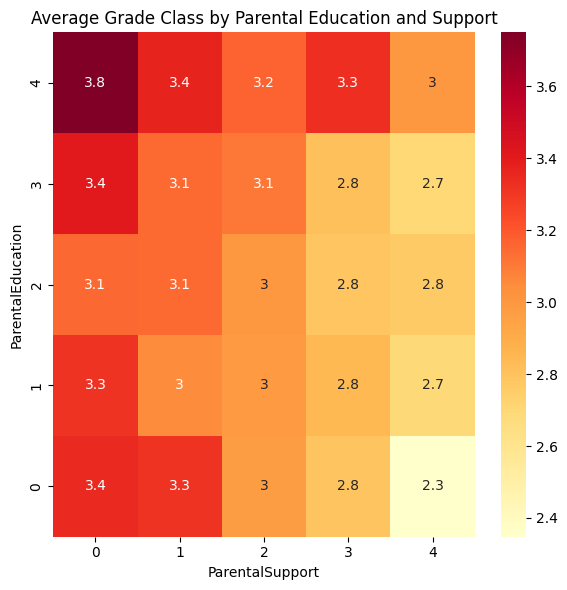

In [14]:
#Parental Education and suppport
plt.figure(figsize=(6, 6))
sns.heatmap(pd.crosstab(data['ParentalEducation'], data['ParentalSupport'], 
                        values=data['GradeClass'], aggfunc='mean'),
            cmap='YlOrRd', annot=True)
plt.title('Average Grade Class by Parental Education and Support')
plt.ylabel('ParentalEducation')
plt.xlabel('ParentalSupport')

# Reverse the y-axis
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

- Higher Parental Education generally correlates with higher grades. These parents may provide a rich learning environment without direct involvement, fostering self-reliance in their children.
- Parental Support's Impact Varies:
The unexpected pattern where higher parental support doesn't always lead to better grades could be due to several factors:

    a) Over-involvement might lead to reduced student independence.

    b) High support might be a reaction to existing academic struggles.
    
    c) The quality of support may vary, and quantity alone doesn't guarantee effectiveness.
- Complex Interaction:
This highlights that academic performance is influenced by multiple factors beyond just parental education and support.

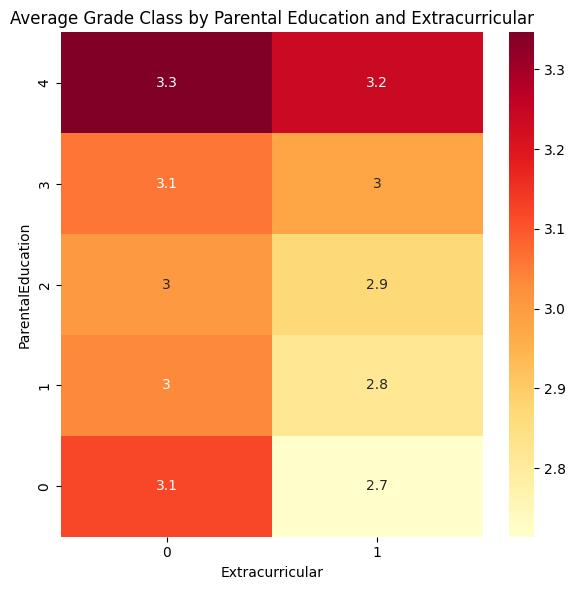

In [15]:
#Parental Education and Extracurricular Activities
plt.figure(figsize=(6, 6))
sns.heatmap(pd.crosstab(data['ParentalEducation'], data['Extracurricular'], 
                        values=data['GradeClass'], aggfunc='mean'),
            cmap='YlOrRd', annot=True)
plt.title('Average Grade Class by Parental Education and Extracurricular')
plt.ylabel('ParentalEducation')
plt.xlabel('Extracurricular')

# Reverse the y-axis
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

- Parental education level impact:
There's a clear positive correlation between parental education level and average grade class.
    - Higher educated parents may place more emphasis on academic achievement.
    - They might be better equipped to assist with homework and studying


- Extracurricular activities effect:
Students who don't participate in extracurricular activities generally have higher average grades compared to those who do participate, across all parental education levels.
    - Students involved in extracurriculars may have less time and energy for studying.
    - This finding is somewhat counterintuitive, as extracurriculars are often associated with positive outcomes.


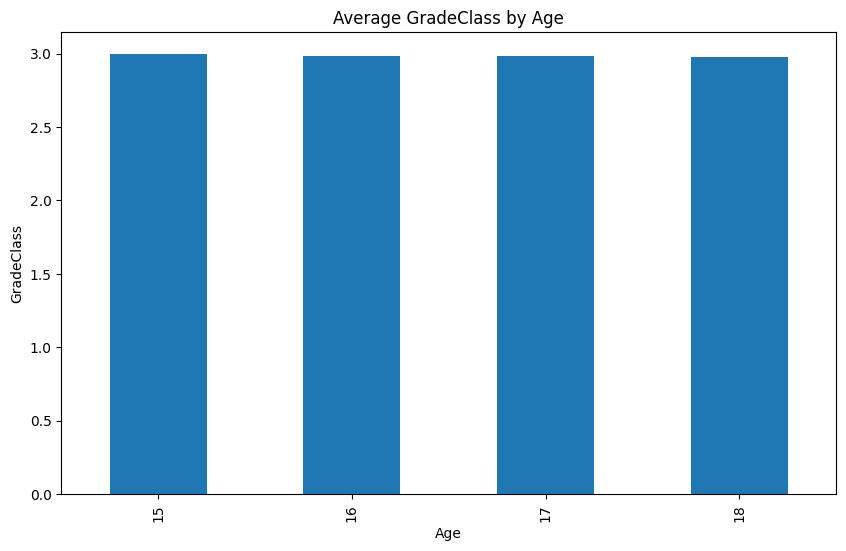

In [16]:
#Age and Gradeclass
plt.figure(figsize=(10, 6))
data.groupby('Age')['GradeClass'].mean().plot(kind='bar')
plt.title('Average GradeClass by Age')
plt.xlabel('Age')
plt.ylabel('GradeClass')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12080\2786329400.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


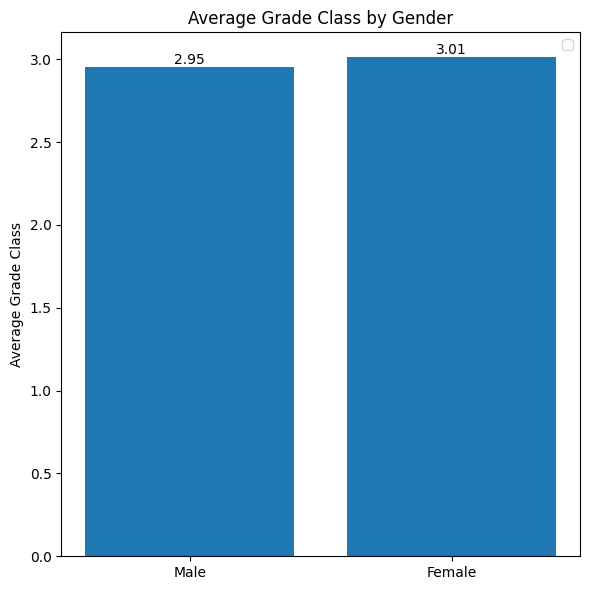

In [17]:
#Gender and gradeclass
avg_grade_by_gender = data.groupby('Gender')['GradeClass'].mean()

# Create bar chart
gender_labels = ['Male', 'Female']  # 0 is Male, 1 is Female

plt.figure(figsize=(6, 6))
plt.bar(gender_labels, avg_grade_by_gender)

plt.ylabel('Average Grade Class')
plt.title('Average Grade Class by Gender')
plt.xticks(gender_labels, gender_labels)
plt.legend()

# Add value labels on top of each bar
for i, v in enumerate(avg_grade_by_gender):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Females have a marginally higher average grade.


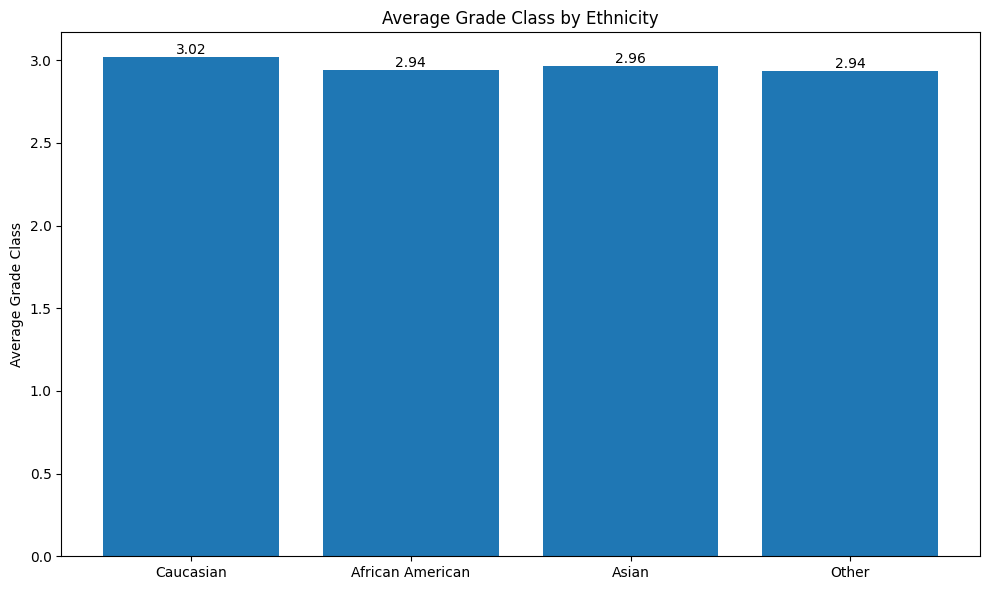

In [18]:
# Ethnicity and GradeClass 
avg_grade_by_ethnicity = data.groupby('Ethnicity')['GradeClass'].mean()

# Create bar chart
ethnicity_labels = ['Caucasian', 'African American', 'Asian', 'Other']

plt.figure(figsize=(10, 6))
bars = plt.bar(ethnicity_labels, avg_grade_by_ethnicity)

plt.ylabel('Average Grade Class')
plt.title('Average Grade Class by Ethnicity')
plt.xticks(range(len(ethnicity_labels)), ethnicity_labels, rotation=0)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Overall, the average grade class scores are fairly close across the different ethnic groups, with only a slight variation.

- Age, gender and ethnicity don't seem to have a strong independent relationship with grade class